In [1]:
# Install dependencies
!pip install -U torch torchvision
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 59.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinu

In [2]:
# # Install Detectron2
# !pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.10/index.html

# Install dependencies for Detectron2
!pip install -U 'git+https://github.com/facebookresearch/fvcore.git'


  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-k2flis90
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-k2flis90
  Resolved https://github.com/facebookresearch/fvcore.git to commit 1d61132af7413155fedc197f72903d01c624bd01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.6-py3-none-any.whl size=65574 sha256=88dcf706a43ec05c1e18c0a64ba5310c0c1067d2f521215c1f81f81dcd4a9407
  Stored in directory: /tmp/pip-ephem-wheel-cache-0gqk_n0v/wheels/8f/cb/6a/3b7ac0e01781855ca3d1417ebf9e15e20d5b7fe37ab063aa50
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31532 sha256=51b51c78f717d606a02af69639210a22792bd9e341ff9bad2ffcc543e5fdeeae
  Stored in directory: /root/.cache/pip/wheels/9a/a3/b6/ac0fcd1b4ed5cfeb3db92e6a0e47

In [3]:
# Clone the Detectron2 repository and install it
!git clone https://github.com/facebookresearch/detectron2.git
!pip install -e detectron2

Cloning into 'detectron2'...
remote: Enumerating objects: 15737, done.
remote: Counting objects: 100% (460/460), done.
remote: Compressing objects: 100% (339/339), done.
remote: Total 15737 (delta 211), reused 304 (delta 112), pack-reused 15277
Receiving objects: 100% (15737/15737), 6.52 MiB | 20.41 MiB/s, done.
Resolving deltas: 100% (11323/11323), done.
Obtaining file:///content/detectron2
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.8/427.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ...

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Image-Path for all **3 types** of Segmentation


In [7]:
image_path = "/content/drive/My Drive/Colab Notebooks/CompleteImages/1.jpg"  # Path to the uploaded image

In [3]:
import cv2
import torch
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.data import MetadataCatalog
from detectron2.utils.visualizer import Visualizer
from google.colab.patches import cv2_imshow  # Import cv2_imshow for Colab
import matplotlib.pyplot as plt

# **Panoptic Segmentation using Detectron2 by Facebook AI Research (FAIR)**

model_final_c10459.pkl: 184MB [00:01, 125MB/s]                           
/usr/local/lib/python3.10/dist-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


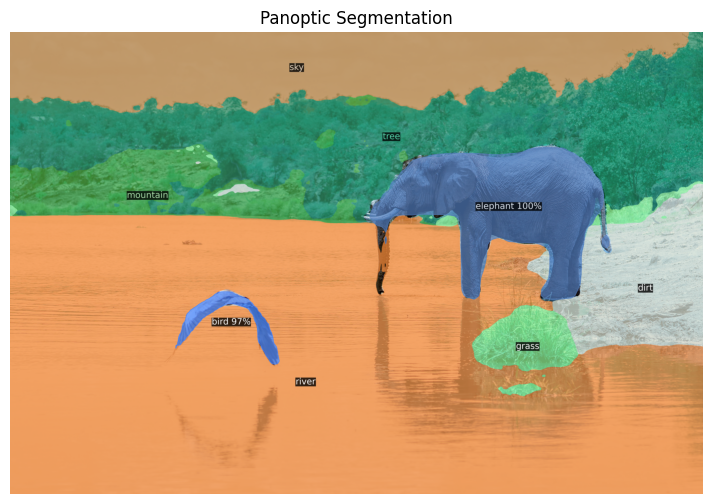

In [4]:
# Step 1: Setup configuration
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_50_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_50_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set the testing threshold for this model
cfg.MODEL.PANOPTIC_FPN.COMBINE.INSTANCES_CONFIDENCE_THRESH = 0.5

# Step 2: Create predictor
predictor = DefaultPredictor(cfg)

# Step 3: Load and preprocess the image
image = cv2.imread(image_path)

# Step 4: Perform panoptic segmentation
panoptic_seg, segments_info = predictor(image)["panoptic_seg"]

# Step 5: Visualize results
v = Visualizer(image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]))
out = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)

# Step 6: Display or save the output
output_image = out.get_image()[:, :, ::-1]

# # Display both original and segmented images
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# ax1.axis('off')
# ax1.set_title('Original Image')

# ax2.imshow(output_image)
# ax2.axis('off')
# ax2.set_title('Panoptic Segmentation')

# plt.show()

plt.figure(figsize=(12, 6))
plt.imshow(output_image)
plt.axis('off')
plt.title('Panoptic Segmentation')
plt.show()

# Optionally, save the output
# cv2.imwrite("/mnt/data/output_panoptic_segmentation.jpg", output_image)



# **Semantic Segmentation using Detectron2 by Facebook AI Research (FAIR)**

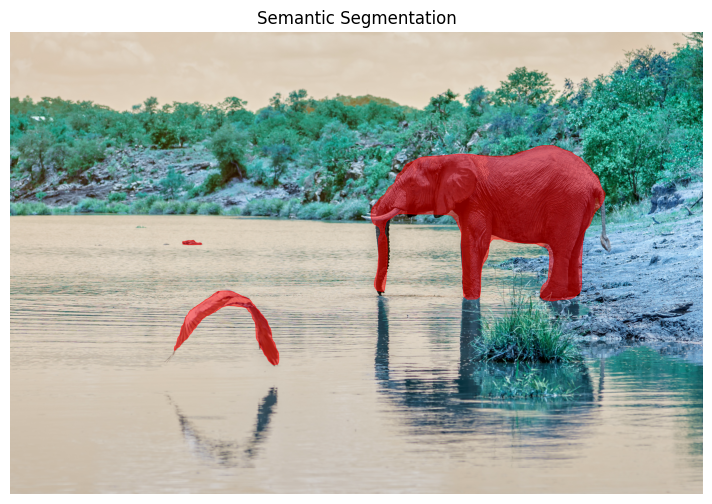

In [9]:
import cv2
import matplotlib.pyplot as plt
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import MetadataCatalog

# Step 1: Setup configuration for instance segmentation (as a proxy for semantic segmentation)
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set the testing threshold for this model

# Step 2: Create predictor
predictor = DefaultPredictor(cfg)

# Step 3: Load and preprocess the image
image = cv2.imread(image_path)

# Step 4: Perform instance segmentation (we will treat it as semantic segmentation for this example)
outputs = predictor(image)
instances = outputs["instances"]

# Create a blank mask for semantic segmentation visualization
semantic_seg = instances.pred_masks.max(dim=0)[0].cpu().numpy()

# Step 5: Visualize results
v = Visualizer(image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), instance_mode=ColorMode.IMAGE)
out = v.draw_binary_mask(semantic_seg, color="blue")

# Step 6: Display the semantic segmentation result
output_image = out.get_image()[:, :, ::-1]

plt.figure(figsize=(12, 6))
plt.imshow(output_image)
plt.axis('off')
plt.title('Semantic Segmentation')
plt.show()

# Optionally, save the output
# cv2.imwrite("/mnt/data/output_semantic_segmentation.jpg", output_image)


# **Instance Segmentation using Detectron2 by Facebook AI Research (FAIR)**

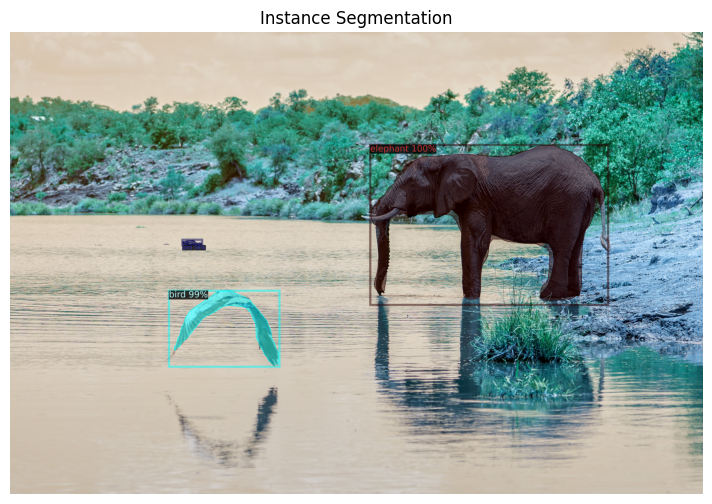

In [10]:
# Step 1: Setup configuration for instance segmentation
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set the testing threshold for this model

# Step 2: Create predictor
predictor = DefaultPredictor(cfg)

# Step 3: Load and preprocess the image
image = cv2.imread(image_path)

# Step 4: Perform instance segmentation
outputs = predictor(image)

# Step 5: Visualize results
v = Visualizer(image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]))
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# Step 6: Display the instance segmentation result
output_image = out.get_image()[:, :, ::-1]

plt.figure(figsize=(12, 6))
plt.imshow(output_image)
plt.axis('off')
plt.title('Instance Segmentation')
plt.show()

# Optionally, save the output
# cv2.imwrite("/mnt/data/output_instance_segmentation.jpg", output_image)
